# Исследование закономерностей, определяющих успешность компьютерных игр
## Описание проекта
Цель проекта: выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
## Описание данных
* `Name` — название игры
* `Platform` — платформа
* `Year_of_Release` — год выпуска
* `Genre` — жанр игры
* `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
* `EU_sales` — продажи в Европе (миллионы проданных копий)
* `JP_sales` — продажи в Японии (миллионы проданных копий)
* `Other_sales` — продажи в других странах (миллионы проданных копий)
* `Critic_Score` — оценка критиков (максимум 100)
* `User_Score` — оценка пользователей (максимум 10)
* `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-0">Описание проекта</a></span></li><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-1">Описание данных</a></span></li><li><span><a href="#Загрузка-данных-и-библиотек,-создание-функций" data-toc-modified-id="Загрузка-данных-и-библиотек,-создание-функций-2">Загрузка данных и библиотек, создание функций</a></span></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-3">Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Проверка-пропусков" data-toc-modified-id="Проверка-пропусков-3.1">Проверка пропусков</a></span></li><li><span><a href="#Корректировка-типов-данных" data-toc-modified-id="Корректировка-типов-данных-3.2">Корректировка типов данных</a></span></li><li><span><a href="#Проверка-дубликатов" data-toc-modified-id="Проверка-дубликатов-3.3">Проверка дубликатов</a></span></li><li><span><a href="#Обогащение-данных" data-toc-modified-id="Обогащение-данных-3.4">Обогащение данных</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ" data-toc-modified-id="Исследовательский-анализ-4">Исследовательский анализ</a></span><ul class="toc-item"><li><span><a href="#Выпуск-игр-по-годам" data-toc-modified-id="Выпуск-игр-по-годам-4.1">Выпуск игр по годам</a></span></li><li><span><a href="#Игры-на-разных-платформах" data-toc-modified-id="Игры-на-разных-платформах-4.2">Игры на разных платформах</a></span></li><li><span><a href="#Определение-актуального-промежутка-времени" data-toc-modified-id="Определение-актуального-промежутка-времени-4.3">Определение актуального промежутка времени</a></span></li><li><span><a href="#Определение-потенциально-прибыльных-платформ" data-toc-modified-id="Определение-потенциально-прибыльных-платформ-4.4">Определение потенциально прибыльных платформ</a></span></li><li><span><a href="#Общее-распределение-игр-по-жанрам" data-toc-modified-id="Общее-распределение-игр-по-жанрам-4.5">Общее распределение игр по жанрам</a></span></li></ul></li><li><span><a href="#Портрет-пользователя-каждого-региона" data-toc-modified-id="Портрет-пользователя-каждого-региона-5">Портрет пользователя каждого региона</a></span></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-6">Проверка гипотез</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-7">Общий вывод</a></span></li></ul></div>

## Загрузка данных и библиотек, создание функций

In [1]:
!pip install missingno

In [2]:
# импорт библиотек
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style 
import seaborn as sns
import scipy.stats as stats
from scipy import stats as st
import datetime as dt
import missingno as msno
import warnings
warnings.filterwarnings("ignore")

In [3]:
# функция для прорисовки графиков
def create_any_bar(groupby_column, func, y='name'):
    plt.style.use('seaborn-v0_8-pastel')
    df_to_plot = game.groupby(groupby_column)[y]
    if func == 'count':
        df_to_plot_calculated = df_to_plot.count()
        figsize = (15,5)
        plot = df_to_plot_calculated.plot(kind='bar', y=y, figsize=figsize, ec='black', color='orange')
    elif func == 'sum':
        df_to_plot_calculated = df_to_plot.sum().sort_values()
        figsize = (15,10)
        plot = df_to_plot_calculated.plot(kind='barh', y=y, figsize=figsize, ec='black', color='orange')

In [4]:
# функция для прорисовки графиков top_in_regions_plot
def top_in_regions_plot(groupby, region_sales, ax):
    pivot = actual_g.groupby(groupby).agg({region_sales: 'sum'}).sort_values(by=region_sales, ascending=False)[:5]
    title_dict = {'na_sales': 'North America Sales', 'eu_sales': 'Europe Sales', 'jp_sales': 'Japan Sales', 'other_sales':'Other sales'}
    color_dict = {'na_sales': 'red', 'eu_sales': 'yellow', 'jp_sales': 'orange', 'other_sales':'grey'}
    plot = pivot.plot(kind='bar', ec='black', title=title_dict[region_sales], ax=axes[ax], legend=None,
                   fontsize=18, color=color_dict[region_sales], rot=20)
    plot.set_xlabel('')
    plot.title.set_size(20)

In [5]:
# устанавливаем стиль графиков
sns.set_style('whitegrid')
# снимаем ограничение на ширину столбцов
pd.set_option('display.max_colwidth', None) 
# загружаем датасеты
game = pd.read_csv('../datasets/games.csv')
game.sample(8, random_state=0).T

,7634,13771,3051,15726,578,14668,10421,10231
Name,Press Your Luck 2010 Edition,Aeon Flux,Castlevania: Lords of Shadow,Prince of Stride,Final Fantasy XIII-2,World of Zoo,Gravity Games Bike: Street Vert Dirt,Calling
Platform,DS,PS2,X360,PSV,PS3,PC,PS2,Wii
Year_of_Release,2009.0,2005.0,2010.0,2015.0,2011.0,2009.0,2002.0,2009.0
Genre,Misc,Action,Action,Adventure,Role-Playing,Simulation,Sports,Adventure
NA_sales,0.18,0.02,0.42,0.0,0.78,0.0,0.05,0.06
EU_sales,0.0,0.02,0.17,0.0,0.73,0.02,0.04,0.04
JP_sales,0.0,0.0,0.01,0.02,0.89,0.0,0.0,0.0
Other_sales,0.01,0.01,0.05,0.0,0.23,0.01,0.01,0.01
Critic_Score,NaN,66.0,83.0,NaN,79.0,NaN,24.0,49.0
User_Score,tbd,5.8,7.8,NaN,6.6,8.4,4.1,6.7


In [6]:
# выводим всю нужную информацию
display(game.head().T)
display(game.info())
print('Число уникальных значений по столбцам')
display(game.nunique())
print('Явных дубликатов:',game.duplicated().sum())
display(game.describe())

,0,1,2,3,4
Name,Wii Sports,Super Mario Bros.,Mario Kart Wii,Wii Sports Resort,Pokemon Red/Pokemon Blue
Platform,Wii,NES,Wii,Wii,GB
Year_of_Release,2006.0,1985.0,2008.0,2009.0,1996.0
Genre,Sports,Platform,Racing,Sports,Role-Playing
NA_sales,41.36,29.08,15.68,15.61,11.27
EU_sales,28.96,3.58,12.76,10.93,8.89
JP_sales,3.77,6.81,3.79,3.28,10.22
Other_sales,8.45,0.77,3.29,2.95,1.0
Critic_Score,76.0,NaN,82.0,80.0,NaN
User_Score,8,NaN,8.3,8,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

Число уникальных значений по столбцам


Name               11559
Platform              31
Year_of_Release       37
Genre                 12
NA_sales             402
EU_sales             307
JP_sales             244
Other_sales          155
Critic_Score          82
User_Score            96
Rating                 8
dtype: int64

Явных дубликатов: 0


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Файл с данными и нужные библиотеки были успешно загружены; отображена основная информация по таблице. Для дальнейшео анализа необходимо привести названия столбцов к naming convention, проверить пропуски и дубликаты.

## Подготовка данных

In [7]:
# переименование названий столбцов в таблицах
game.columns = game.columns.str.strip()
game.columns = game.columns.str.lower()
game.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Проверка пропусков

In [8]:
print('Пропуски по столбцам')
display(game.isna().sum())
print('Проценты пропусков по столбцам')
round((game.isna().sum() / game.shape[0] * 100), 2)

Пропуски по столбцам


name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Проценты пропусков по столбцам


name                0.01
platform            0.00
year_of_release     1.61
genre               0.01
na_sales            0.00
eu_sales            0.00
jp_sales            0.00
other_sales         0.00
critic_score       51.32
user_score         40.09
rating             40.48
dtype: float64

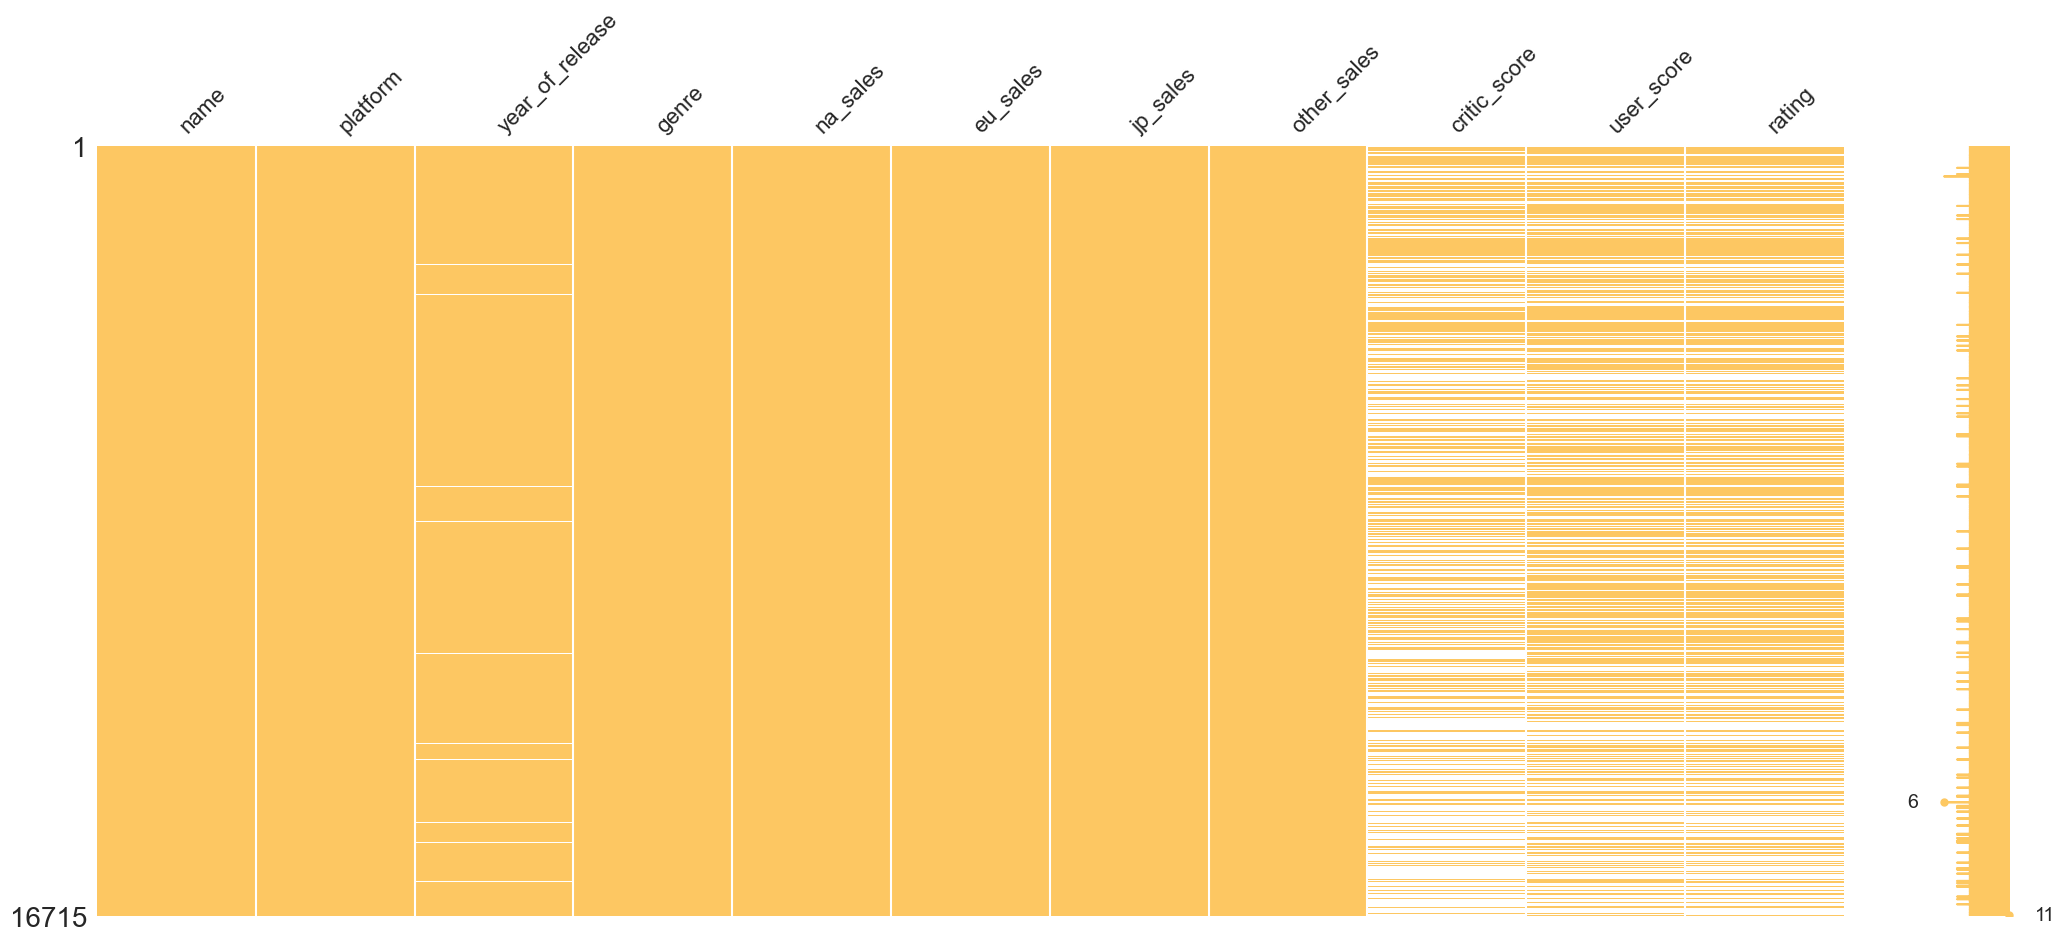

In [9]:
msno.matrix(game, color=(0.994, 0.784, 0.386))
plt.show()

Строки с пропусками в столбцах, где пропусков не так много, необходимо удалить. 

In [10]:
# проверим информацию о компьютерных играх, название которых не указано
game.query('name.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


У двух игр нет информации о названии и жанре.

In [11]:
game = game.dropna(subset=['name', 'year_of_release'])

Проверим уникальные значения в оценках пользователей и критиков, рейтинге.

In [12]:
game['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

In [13]:
game['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [14]:
game['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

TBD - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Скорее всего либо не было отзывов вообше, либо их было очень мало для формирования рейтинга. Заменим значение "tbd" на NaN.

In [15]:
game['rating'] = game['rating'].fillna("undefined")
game['user_score'] = game['user_score'].replace('tbd', np.NaN)

### Корректировка типов данных

In [16]:
game['year_of_release'] = game['year_of_release'].astype('int')
game['user_score'] = game['user_score'].astype('float')

### Проверка дубликатов
Если название игры, год релиза и платформа совпадут, то записи будут считаться дубликатами.

In [17]:
# проверим количество дубликатов для столбцов 'name', 'plarform' и 'year_of_release'
display(game.duplicated(subset = ['name', 'platform','year_of_release'], keep = False).sum())
game[game[['name', 'platform','year_of_release']].duplicated(keep = False)]

2

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


Дубликат с меньшими цифрами продаж необходимо удалить.

In [18]:
game = game.drop_duplicates(
    subset = ['name', 'platform','year_of_release'], keep = 'first')

In [19]:
game.genre.unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

Дублирующихся жанров не обнаружено.
### Обогащение данных
**Добавим столбец с суммарными продажами по всем регионам**

In [20]:
game['total_sales'] = game['na_sales'] + game['eu_sales'] + game['jp_sales'] + game['other_sales']

In [21]:
game.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16443 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int32  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           16443 non-null  object 
 11  total_sales      16443 non-null  float64
dtypes: float64(7), int32(1), object(4)
memory usage: 1.6+ MB


**Добавим столбец с расшифровкой рейтинга игр**

In [22]:
ESRB_dict = {
    'E': 'Для всех','K-A':'Для всех (с 6 лет)','EC': 'с 3 лет', 'E10+': 'с 10 лет', 'M': 'с 17 лет', 'T': 'с 13 лет', 'AO': 'Для взрослых', 'RP': 'Рейтинг обсуждается', 'undefined' : 'Не определен'}
game['ESRB_description'] = game[game['rating'].notnull()]['rating'].map(ESRB_dict)

Предобработка выполнена успешно: остались 3 столбца с пропусками, но с ними сложно что-то сделать. Названия столбцов теперь соответствуют naming convention, совершена проверка дубликатов, исправлены типы данных, добавлены столбцы для удобства дальнейшего анализа.
## Исследовательский анализ
### Выпуск игр по годам

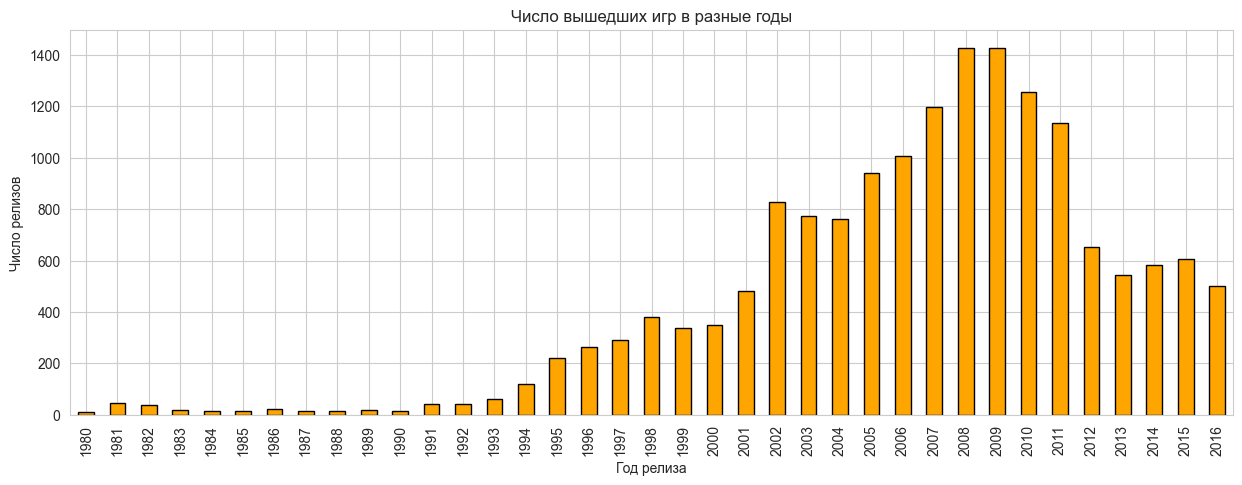

In [23]:
create_any_bar('year_of_release', 'count')
plt.xlabel('Год релиза')
plt.ylabel('Число релизов')
plt.title('Число вышедших игр в разные годы')
plt.show()

Рынок компьютерных игр меняется очень быстро, особенно в последние годы. Данные прошлого века уже, очевидно, не являются актуальными. Тем не менее нулевые годы тоже не будут репрезентативными, тк характеризуют резкую волну набирания популярности данного рынка.
После 2008 и 2009 годов наблюдается спад выпуска компьютерныз игр, поскольку после кризиса стало труднее задействовать финансовые ресурсы.

Со временем изменился подход к созданию игр, больше внимания стали уделять графике, сюжету, что замедлило релизы новых игр.
### Игры на разных платформах

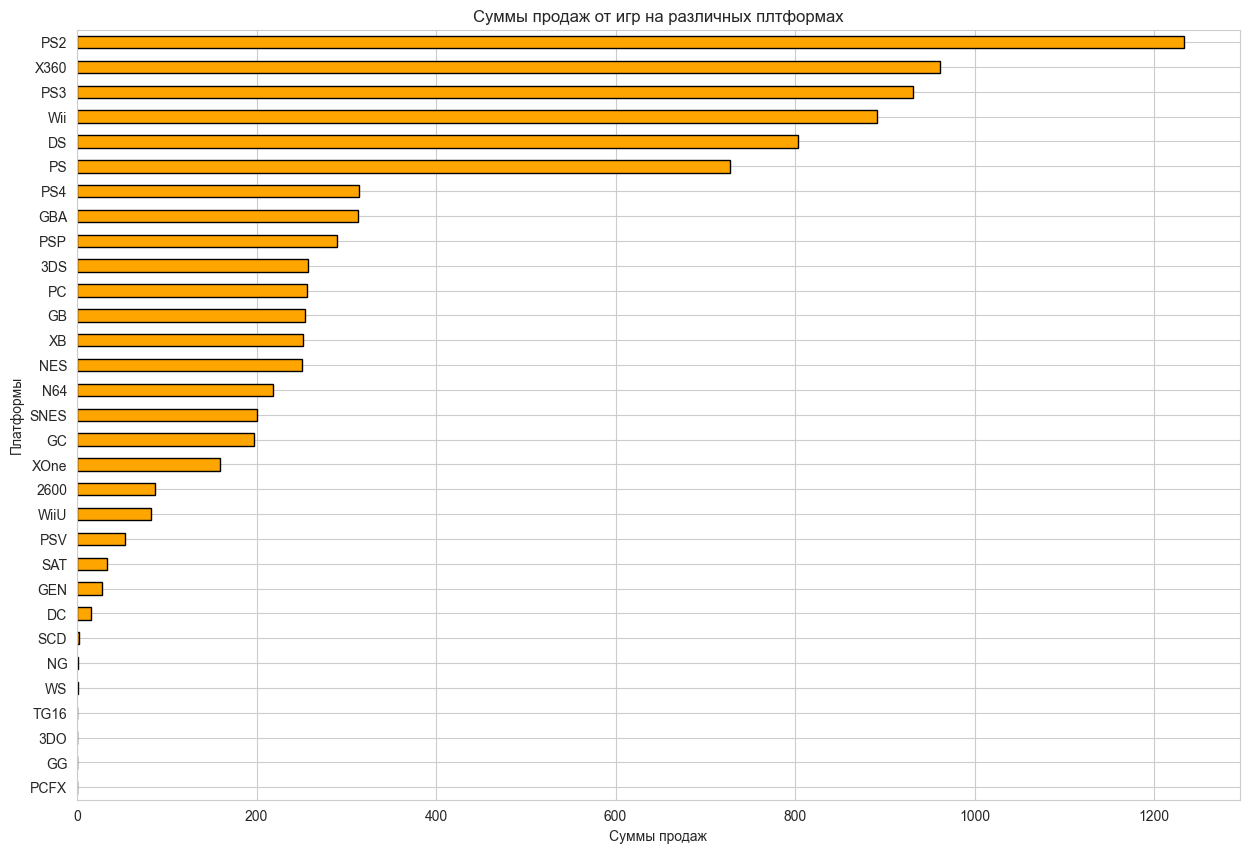

In [24]:
create_any_bar('platform', 'sum', 'total_sales')
plt.xlabel('Суммы продаж')
plt.ylabel('Платформы')
plt.title('Суммы продаж от игр на различных плтформах')
plt.show()

In [25]:
total_sales_per_platform = game.pivot_table(
    index = 'platform',
    values = 'total_sales',
    aggfunc = 'sum').sort_values(
    by = 'total_sales', ascending = False).reset_index()
total_sales_per_platform['share'] = total_sales_per_platform['total_sales'] / total_sales_per_platform['total_sales'].sum()
total_sales_per_platform.style.background_gradient(cmap='Oranges')

,platform,total_sales,share
0,PS2,1233.560000,0.139949
1,X360,961.240000,0.109054
2,PS3,931.330000,0.105661
3,Wii,891.180000,0.101105
4,DS,802.780000,0.091076
5,PS,727.580000,0.082545
6,PS4,314.140000,0.035640
7,GBA,312.880000,0.035497
8,PSP,289.530000,0.032848
9,3DS,257.810000,0.029249


Судя по графику и таблице, на рынке есть очевидные лидеры. PS, PS2 и PS3 находятся среди них, поэтому есть основания предпологать, что популярность PS4 - лишь вопрос времени. В лидерах также X360, Wii и DS.

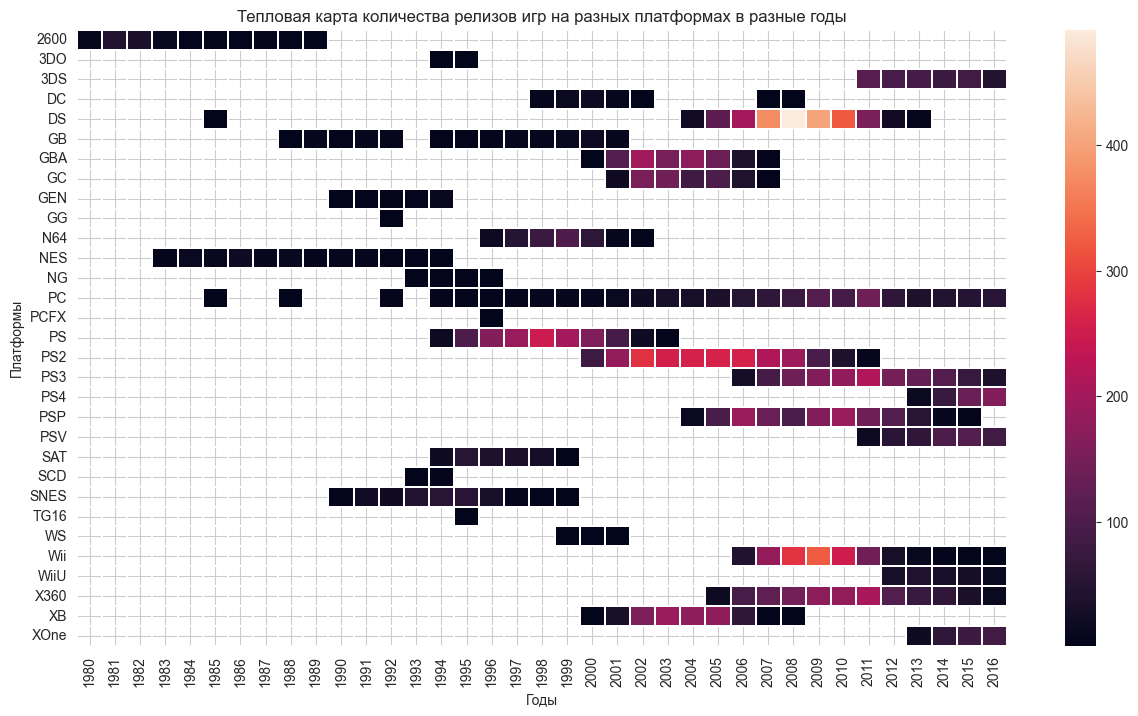

In [26]:
# количество релизов игр в зависимости от платформы и года
total_relaese = game.sort_values(by='total_sales').pivot_table(
    index='platform', 
    columns='year_of_release', 
    values='total_sales', 
    aggfunc='count'
)
fig, ax = plt.subplots(figsize=(15, 8))
ax = sns.heatmap(total_relaese,linewidths= .2)
ax.set(
    title='Тепловая карта количества релизов игр на разных платформах в разные годы', 
    ylabel='Платформы', 
    xlabel='Годы'
)
plt.show()

За редкими исключениями средний срок жизни платформы составляет примерно +-10 лет при успехе.
### Определение актуального промежутка времени
Учитывая влияние кризисных событий и скорость изменения рынка, лучше выбрать последние 5 лет.

In [27]:
actual_g = game.query('year_of_release >= 2012')
display(actual_g.sample(10, random_state=10).T)
actual_g.shape

,14758,12368,3685,5444,12788,149,7031,6751,3845,13005
name,Samurai Warriors 2,Mirror's Edge Catalyst,F1 2013,NHL 17,Remember Me,The Last of Us,Epic Mickey 2: The Power of Two,Ninja Gaiden 3,Rory McIlroy PGA Tour,WRC 5: FIA World Rally Championship
platform,PS3,PC,PS3,PS4,PC,PS3,WiiU,X360,PS4,PS4
year_of_release,2013,2016,2013,2016,2013,2013,2012,2012,2015,2015
genre,Action,Platform,Racing,Sports,Action,Action,Action,Action,Action,Sports
na_sales,0.0,0.01,0.01,0.19,0.0,2.41,0.13,0.16,0.18,0.0
eu_sales,0.0,0.05,0.42,0.08,0.05,2.18,0.07,0.05,0.25,0.05
jp_sales,0.03,0.0,0.03,0.0,0.0,0.28,0.01,0.03,0.0,0.0
other_sales,0.0,0.0,0.09,0.06,0.0,0.99,0.02,0.02,0.08,0.01
critic_score,NaN,74.0,77.0,78.0,65.0,95.0,57.0,58.0,61.0,NaN
user_score,NaN,4.4,6.3,5.8,7.4,9.1,5.6,4.4,3.7,NaN


(2885, 13)

Выборка сильно уменьшилась после сокращения временного промежутка.

In [28]:
total_sales_per_platform_ac = actual_g.pivot_table(
    index = 'platform',
    values = 'total_sales',
    aggfunc = 'sum').sort_values(
    by = 'total_sales', ascending = False).reset_index()
total_sales_per_platform_ac.style.background_gradient(cmap='Oranges')

,platform,total_sales
0,PS4,314.140000
1,PS3,288.780000
2,X360,236.540000
3,3DS,194.610000
4,XOne,159.320000
5,WiiU,82.190000
6,PC,62.650000
7,PSV,49.180000
8,Wii,35.370000
9,DS,12.550000


На актуальной выборке лидируют PS4, PS3 и X360.
### Определение потенциально прибыльных платформ
Очевидно, не беря в рассчёт возможность возникновения новых платформ, среди текущих лидеров самыми популярными в будущем будут PS-платформы; и чем новее, тем популярнее.

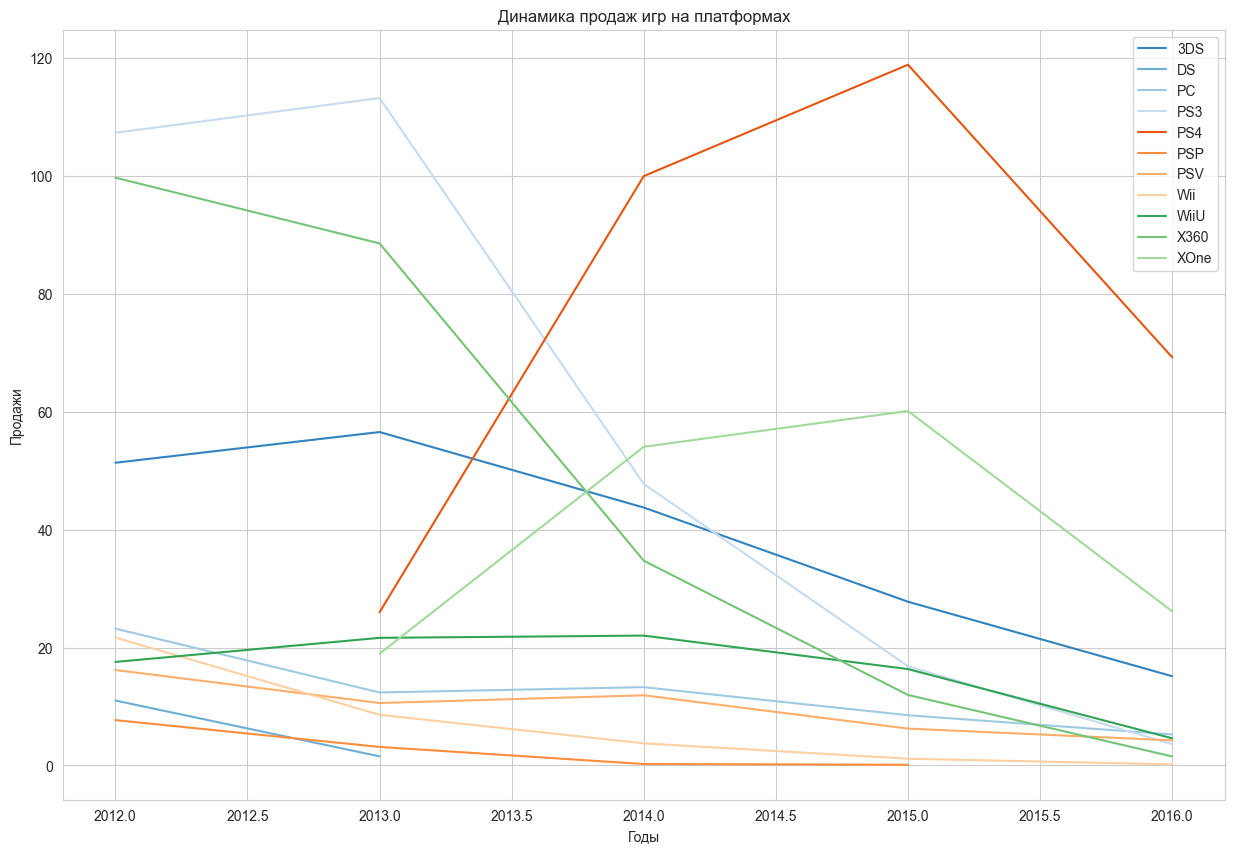

In [29]:
# устанавливаем стиль графиков
sns.set_style('whitegrid')
sns.set_palette('tab20c')
# таблица динамики
dinamic = actual_g.pivot_table(index='year_of_release',
                columns='platform',
                values='total_sales',
                aggfunc='sum')
dinamic.plot(grid=True, figsize=(15, 10))
plt.legend()
plt.title('Динамика продаж игр на платформах')
plt.xlabel('Годы')
plt.ylabel('Продажи')
plt.show()

Исходя из графика динамики продаж, PS4 выглядит достаточно перспективно. Падение популярности PS3 связано именно с ней. X360 была популярной, но за последние годы на ней выходило меньНижше игр, чем раньше. XOne держится на не самом низком уровне. В 2016 году ниже ранее перечисленных платформ по уровню продаж WiiU и 3DS. Остальные ещё ниже и перспектив их взлёта не видно.

In [30]:
print("Матрица корреляций")
actual_g[actual_g.platform == "PS4"][['total_sales', 'critic_score', 'user_score']].corr().style.background_gradient(cmap='Oranges')

Матрица корреляций


,total_sales,critic_score,user_score
total_sales,1.000000,0.406568,-0.031957
critic_score,0.406568,1.000000,0.557654
user_score,-0.031957,0.557654,1.000000


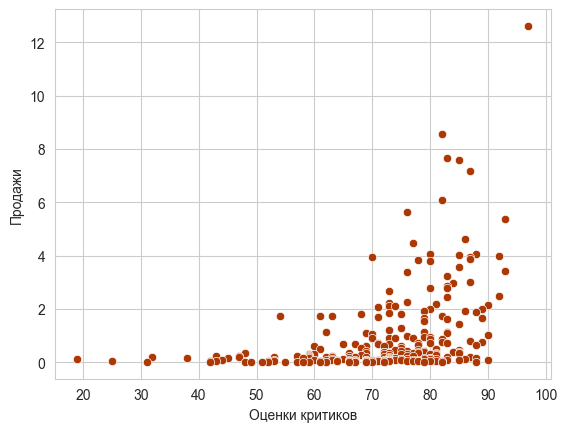

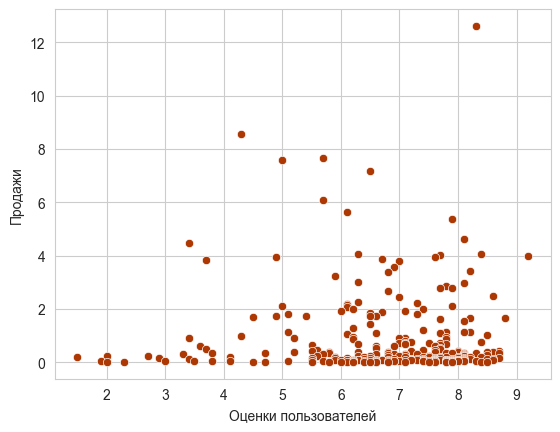

In [31]:
# устанавливаем стиль графиков
sns.set_style('whitegrid')
sns.set_palette('Oranges_r')
#  sns.pairplot(actual_g[actual_g.platform == "PS4"][['total_sales', 'critic_score', 'user_score']])
sns.scatterplot(data=actual_g[actual_g.platform == "PS4"], y="total_sales", x="critic_score")
plt.xlabel('Оценки критиков')
plt.ylabel('Продажи')
plt.show()
sns.scatterplot(data=actual_g[actual_g.platform == "PS4"], y="total_sales", x="user_score")
plt.xlabel('Оценки пользователей')
plt.ylabel('Продажи')
plt.show()

Есть закономерная картина: чем лучше рейтинг, тем игра лучше, следовательно, больше продаж. Несмотря на это, связь не говорит о чёткой зависимости, т.к. не все игры с высокими оценками хорошо продались. Вероятно, есть и другие факторы: наряду с какими играми выходила игра, её стоимость, хайп, поппулярность платформы.

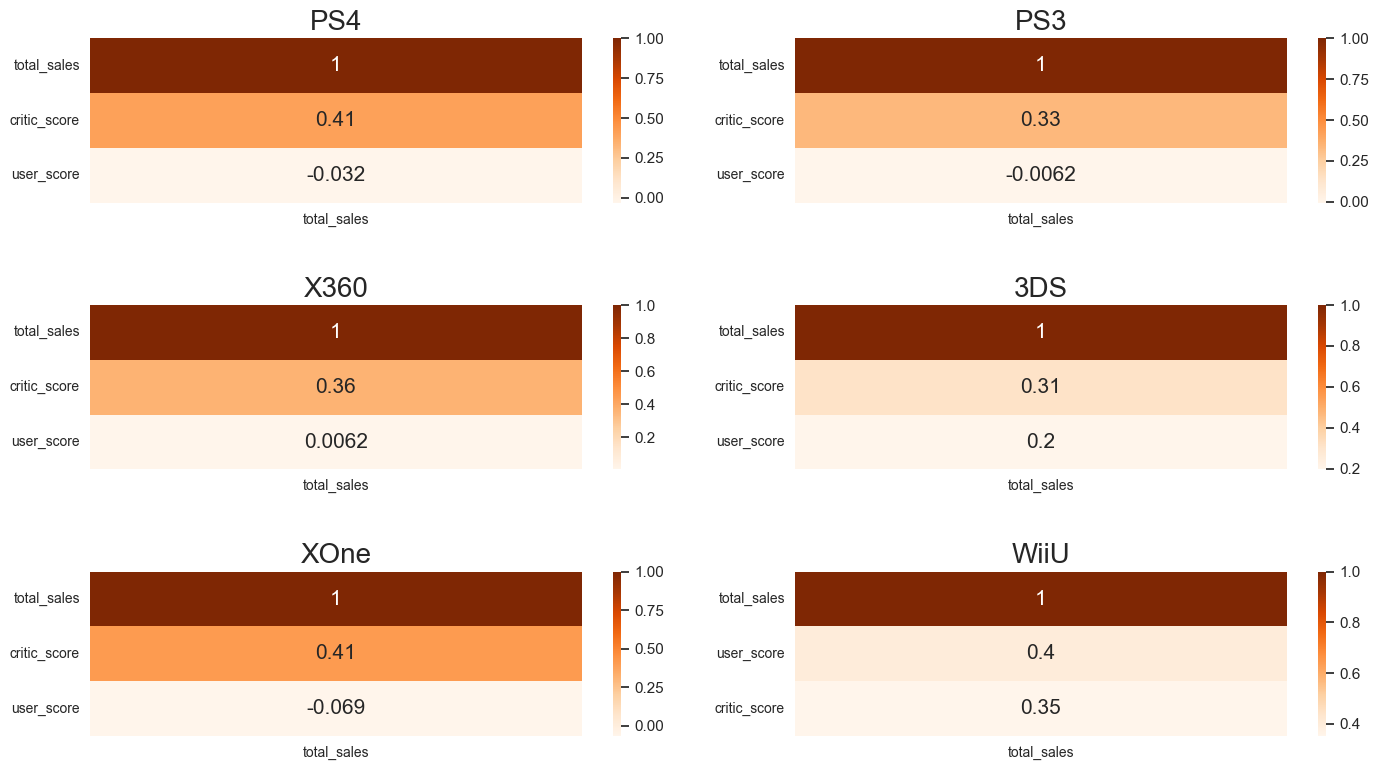

In [32]:
top_platforms = ['PS4','PS3','X360','3DS', 'XOne','WiiU']

rows = len(top_platforms) // 2
cols = 2
fig, axes = plt.subplots(rows, cols, figsize=(15,8.5))
count = 0
for r in range(rows):
    for c in range(cols):
        curr_platform = top_platforms[count]
        df_prep = actual_g[(actual_g['platform'] == curr_platform) & (actual_g['user_score'] > 0)].copy()
        
        df_filtered = df_prep[['total_sales' ,'critic_score', 'user_score']]
        sns.set(font_scale=1.0)
        ax = sns.heatmap(df_filtered.corr()[['total_sales']].sort_values(by='total_sales', ascending=False), 
                         cmap="Oranges", annot=True, annot_kws={'size':15}, ax=axes[r,c])
        ax.set_title(curr_platform, fontsize=20)
        ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
        plt.tight_layout(pad=3)
        count += 1

Исходя из визуализаций, именно оценки пользователей имеют какую-то степень влияния на продажи, в отличие от оценок критиков. Скорее всего, это происходит из-за субъективных факторов: ожидания, критерии оценивания, сюжет.

### Общее распределение игр по жанрам

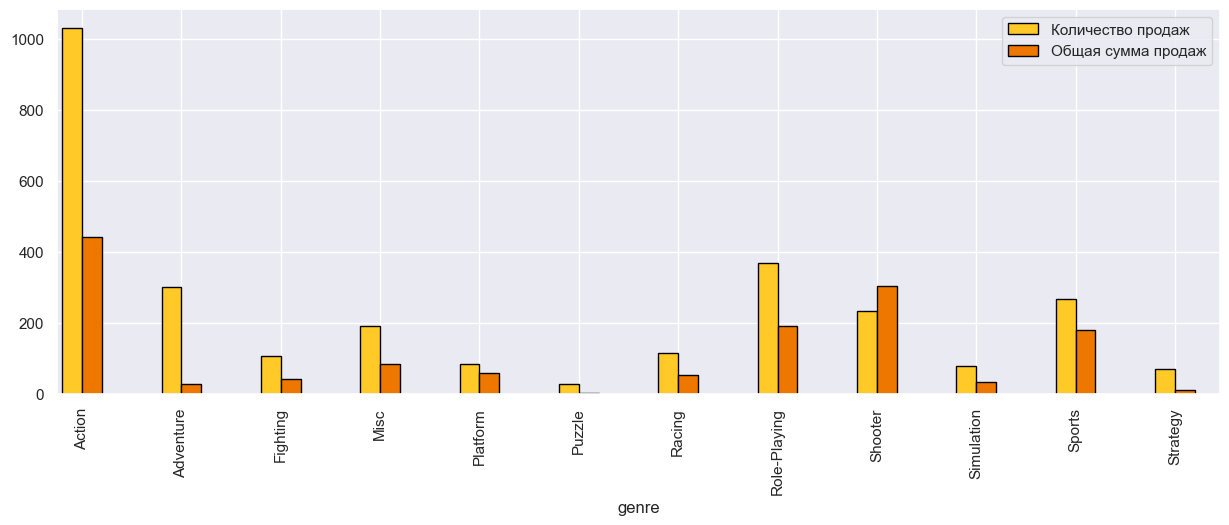

,name,total_sales,ratio
genre,,,
Shooter,235,304.730000,1.296723
Platform,85,61.000000,0.717647
Sports,267,181.060000,0.678127
Role-Playing,370,192.800000,0.521081
Racing,115,53.500000,0.465217
Misc,192,85.040000,0.442917
Simulation,80,35.120000,0.439000
Action,1031,441.120000,0.427856
Fighting,109,44.490000,0.408165


In [33]:
ax = plt.gca()
pivot = actual_g.groupby('genre').agg(
    {'name': 'count', 'total_sales': 'sum'})
pivot['ratio'] = pivot['total_sales'] / pivot['name']
plot1 = pivot['name']
plot1.plot(kind='bar', figsize=(15,5), ec='black', ax=ax, width=0.2, color='#FFCA28', position=1)
plot2 = pivot['total_sales']
plot2.plot(kind='bar', figsize=(15,5), ec='black', ax=ax, width=0.2, color='#EE7700', position=0)
ax.legend(['Количество продаж', 'Общая сумма продаж'])
plt.show()
pivot.sort_values(
    by='ratio', ascending=False).style.background_gradient(cmap='Oranges')

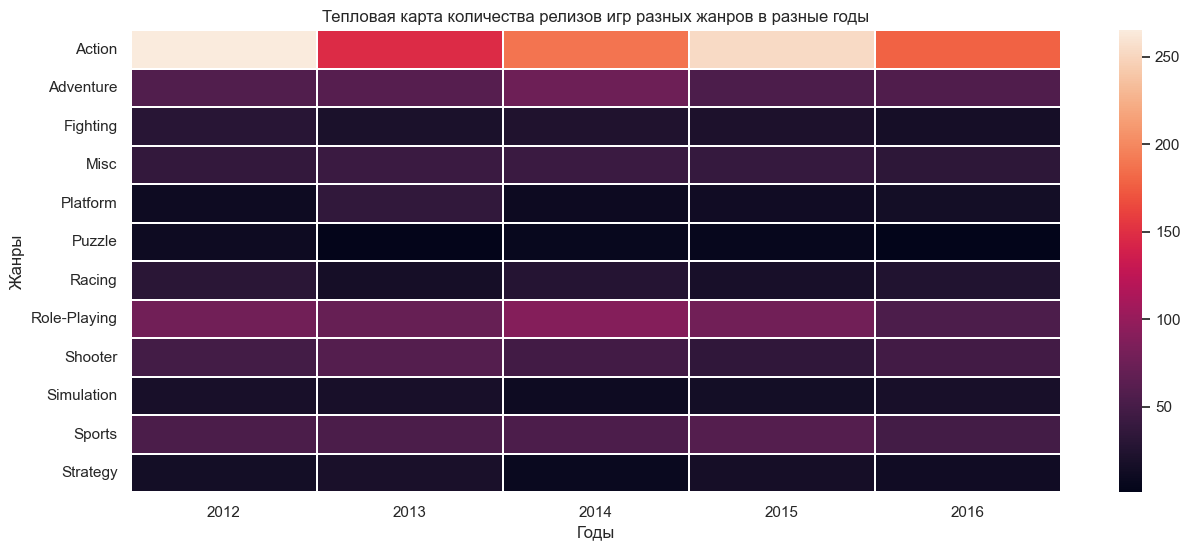

In [34]:
# количество релизов игр в зависимости от жанра и года
total_relaese_genre = actual_g.sort_values(by='total_sales').pivot_table(
    index='genre', 
    columns='year_of_release', 
    values='total_sales', 
    aggfunc='count'
)
fig, ax = plt.subplots(figsize=(15, 6))
ax = sns.heatmap(total_relaese_genre,linewidths= .2)
ax.set(
    title='Тепловая карта количества релизов игр разных жанров в разные годы', 
    ylabel='Жанры', 
    xlabel='Годы'
)
plt.show()

Поскольку неизвестны денежные единицы, по данным визуализациям можно сделать выводы лишь о межжанровом соотношении показателей. По всем показателям игры в жанре action являются самыми популярными. На втором месте по обще сумме продаж shooter-игры (они же самые рентбельные), а по количеству продаж role-playing-игры. Головоломки являются самыми непопулярными. Приключенческие игры самые нерентабельные.
## Портрет пользователя каждого региона

Cамые популярные платформы (топ-5)


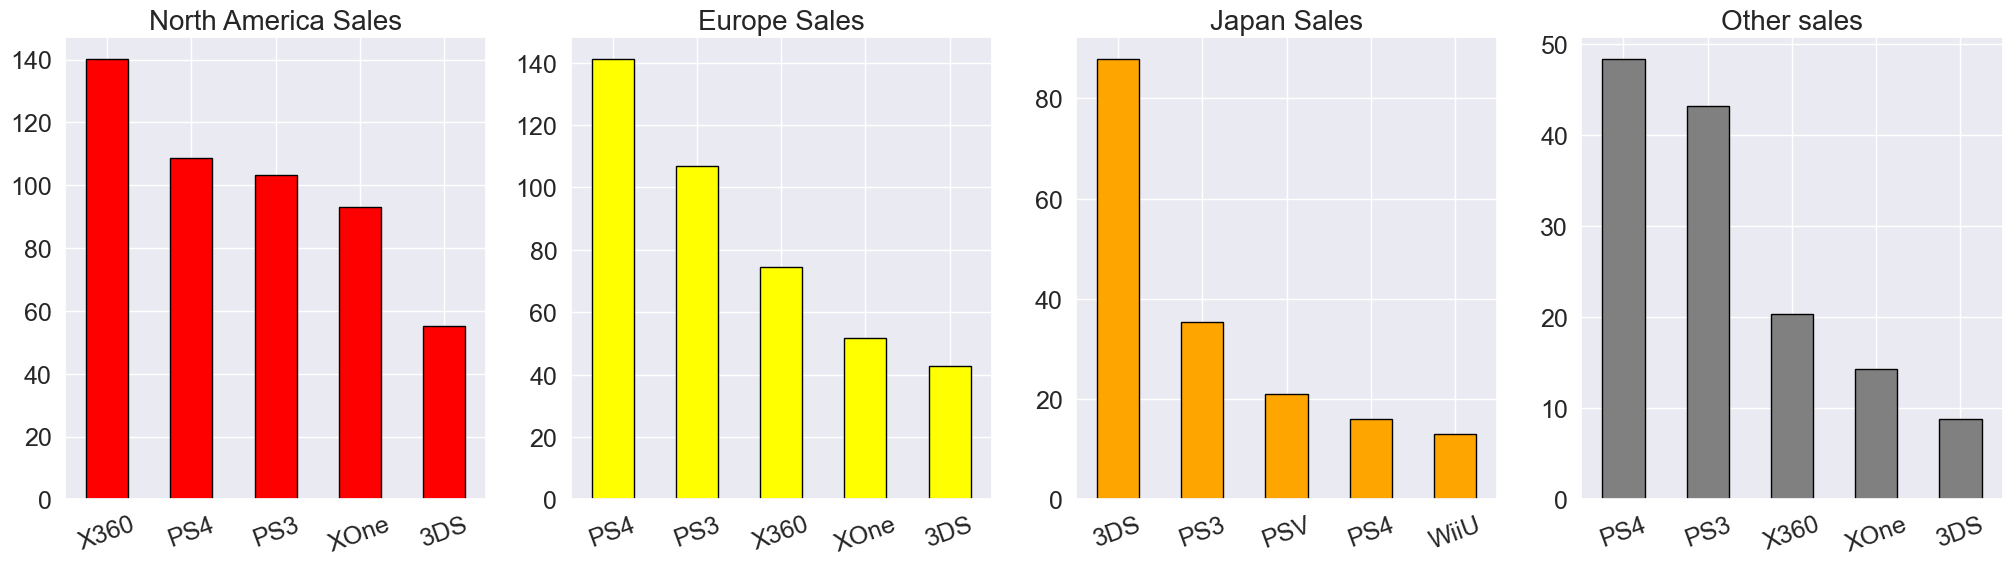

In [35]:
print ('Cамые популярные платформы (топ-5)')
fig, axes = plt.subplots(1, 4, figsize=(25,6))

top_in_regions_plot('platform', 'na_sales', 0)
top_in_regions_plot('platform', 'eu_sales', 1)
top_in_regions_plot('platform', 'jp_sales', 2)
top_in_regions_plot('platform', 'other_sales', 3)

В Северной Америке имели бешеную популярность приставки X360, PS4 и PS3. Вместе с ними XOne и 3DS держатся в топе-5 всех регионов, кроме Японии. PS3 обогнала PS4 по популярности только в Японии, где самой популярной является платформа 3DS, сильно опережающая остальных.

Cамые популярные жанры (топ-5)


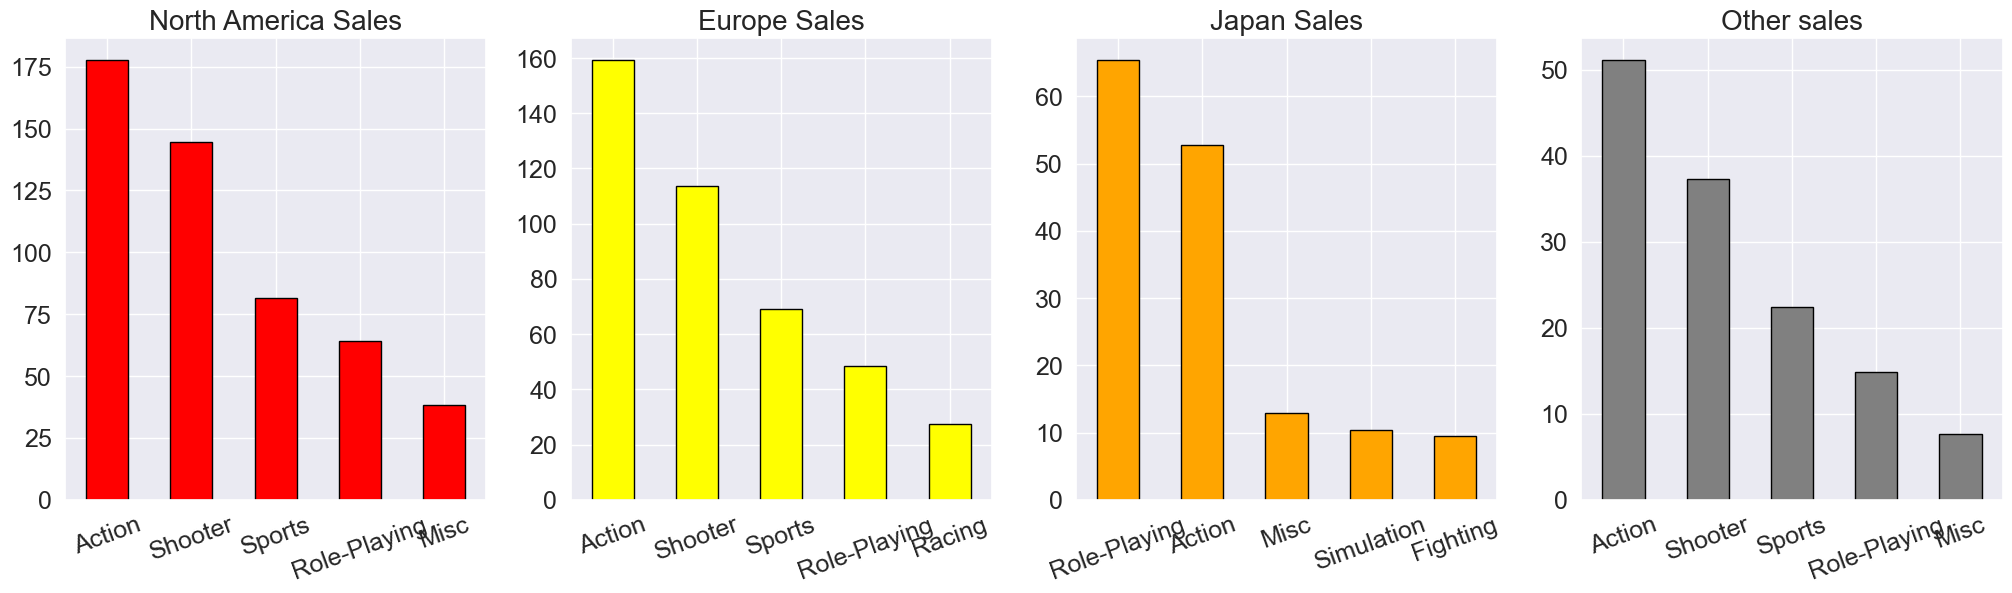

In [36]:
print ('Cамые популярные жанры (топ-5)')
fig, axes = plt.subplots(1, 4, figsize=(25,6))

top_in_regions_plot('genre', 'na_sales', 0)
top_in_regions_plot('genre', 'eu_sales', 1)
top_in_regions_plot('genre', 'jp_sales', 2)
top_in_regions_plot('genre', 'other_sales', 3)

По популярност жанров снова отличилась Япония. В остальных регионах на первом месте жанр action, дале shooter, sports и role-playing. В Японии - role-playing, action, misc, simulation и fighting.

Cамые популярные возрастные группы в играх (топ-5)


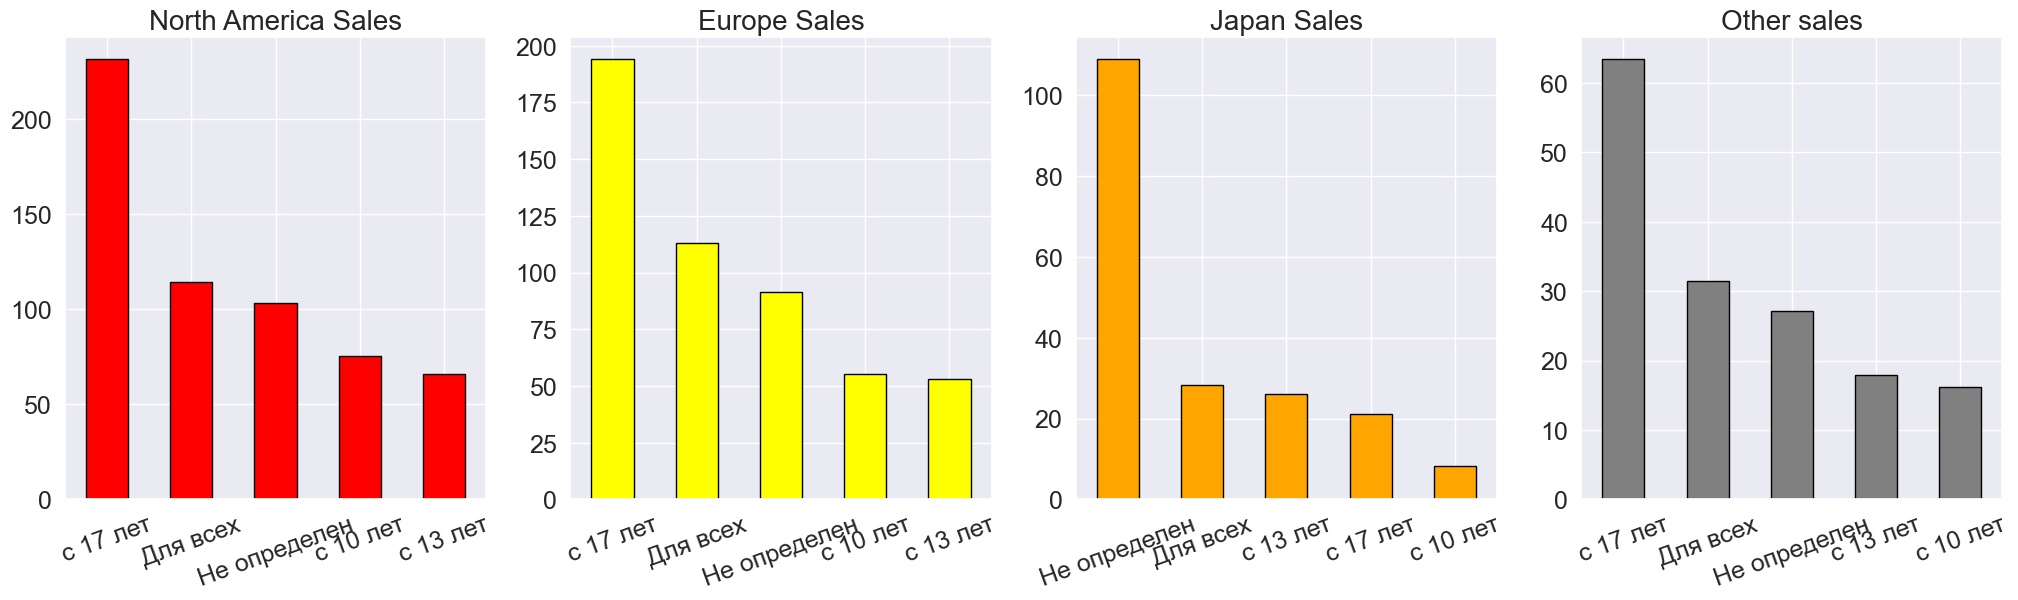

In [37]:
print ('Cамые популярные возрастные группы в играх (топ-5)')
fig, axes = plt.subplots(1, 4, figsize=(25,6))

top_in_regions_plot('ESRB_description', 'na_sales', 0)
top_in_regions_plot('ESRB_description', 'eu_sales', 1)
top_in_regions_plot('ESRB_description', 'jp_sales', 2)
top_in_regions_plot('ESRB_description', 'other_sales', 3)

Из-за большого числа пропусков данные сложно считать на 100% достоверными. Тем не менее по предварительной оценке, везде, кроме Японии, самые популярные игры для аудитории старше 17 лет, для всех. В Японии у большинства проданных игр не определён возрастной рейтинг. Скорее всего, тк данный рейтинг создан в США, некоторые игры, популярные в Японии, имеют специфический рейтинг, неприменимый в азиатской стране.
## Проверка гипотез

Для проверки гипотез используем метод `scipy.stats.ttest_ind()`, т.к. в каждой гипотезе проверяются 2 независимые выборки.

**Гипотеза: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.**

H0: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

H1: средние пользовательские рейтинги платформ Xbox One и PC разные.

**alpha=0.05**

Тип выдвинутой гипотезы - двусторонняя.

In [38]:
sample_1 = actual_g[actual_g['platform']=="XOne"]['user_score'].dropna()
sample_2 = actual_g[actual_g['platform']=="PC"]['user_score'].dropna()

In [39]:
alpha = .05

result_1 = st.ttest_ind(
    sample_1, 
    sample_2,
    equal_var = False)

print('p-значение:', result_1.pvalue)

if (result_1.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.5489537965134912
Не получилось отвергнуть нулевую гипотезу


Не получилось отвергнуть нулевую гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые. С большой долей вероятности средние пользовательские рейтинги платформ XOne и PC не имеют статистически значимых отличий.

**Гипотеза: cредние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.**

H0: cредние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые.

H1: cредние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

**alpha=0.05**

Нулевая гипотеза, как правило, подразумевает равентво показателей выборок, поэтому саму гипотезу о разности следует добавить в альтернативную.

In [40]:
sample_3 = actual_g[actual_g['genre']=="Action"]['user_score'].dropna()
sample_4 = actual_g[actual_g['genre']=="Sports"]['user_score'].dropna()

In [41]:
alpha = .05

result_2 = st.ttest_ind(
    sample_3, 
    sample_4,
    equal_var = False)

print('p-значение:', result_2.pvalue)

if (result_2.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 5.989458066467418e-20
Отвергаем нулевую гипотезу


Таким образом, остаётся верным утверждение, что средние пользовательские рейтинги жанров Action и Sports отличаются.

## Общий вывод

Рынок компьютерных игр меняется очень быстро, особенно в последние годы. Данные прошлого века уже, очевидно, не являются актуальными. Тем не менее нулевые годы тоже не будут репрезентативными, тк характеризуют резкую волну набирания популярности данного рынка. После 2008 и 2009 годов наблюдается спад выпуска компьютерныз игр, поскольку после кризиса стало труднее задействовать финансовые ресурсы. Со временем изменился подход к созданию игр, больше внимания стали уделять графике, сюжету, что замедлило релизы новых игр.

На рынке есть очевидные лидеры. PS, PS2 и PS3 находятся среди них, поэтому есть основания предпологать, что популярность PS4 - лишь вопрос времени. В лидерах также X360, Wii и DS. За редкими исключениями средний срок жизни платформы составляет примерно +-10 лет при успехе. На актуальной выборке (за последние 5 лет) лидируют PS4, PS3 и X360.

Есть закономерная картина: чем лучше рейтинг, тем игра лучше, следовательно, больше продаж. Несмотря на это, связь не говорит о чёткой зависимости, т.к. не все игры с высокими оценками хорошо продались. Вероятно, есть и другие факторы: наряду с какими играми выходила игра, её стоимость, хайп, поппулярность платформы.

Исходя из имеющихся данных, именно оценки пользователей имеют какую-то степень влияния на продажи, в отличие от оценок критиков. Скорее всего, это происходит из-за субъективных факторов: ожидания, критерии оценивания, сюжет.

По всем показателям игры в жанре action являются самыми популярными. На втором месте по обще сумме продаж shooter-игры (они же самые рентбельные), а по количеству продаж role-playing-игры. Головоломки являются самыми непопулярными. Приключенческие игры самые нерентабельные.

В Северной Америке имели бешеную популярность приставки X360, PS4 и PS3. Вместе с ними XOne и 3DS держатся в топе-5 всех регионов, кроме Японии. PS3 обогнала PS4 по популярности только в Японии, где самой популярной является платформа 3DS, сильно опережающая остальных.

По популярност жанров снова отличилась Япония. В остальных регионах на первом месте жанр action, дале shooter, sports и role-playing. В Японии - role-playing, action, misc, simulation и fighting.

Из-за большого числа пропусков данные сложно считать на 100% достоверными. Тем не менее по предварительной оценке, везде, кроме Японии, самые популярные игры для аудитории старше 17 лет, для всех. В Японии у большинства проданных игр не определён возрастной рейтинг. Скорее всего, тк данный рейтинг создан в США, некоторые игры, популярные в Японии, имеют специфический рейтинг, неприменимый в азиатской стране.

Не получилось отвергнуть нулевую гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые. С большой долей вероятности средние пользовательские рейтинги платформ XOne и PC не имеют статистически значимых отличий. Остаётся верным утверждение, что средние пользовательские рейтинги жанров Action и Sports отличаются.

**Таким образом, прослеживается влияние отзывов пользователей на продажи игр. В разных регионах есть определённые предпочтения. У разных платформ есть примерный цикл выпуска игр и популярности.**